# Interactive Visualization with Plotly

For this lab, you'll need to install Plotly. Make sure to follow *both* the [plotly](https://plotly.com/python/getting-started/#installation) steps and the [jupyter support](https://plotly.com/python/getting-started/#jupyterlab-support) steps.

[Plotly](https://plotly.com/python/) is an interactive visualization package which is as part of the [Plotly and Dash](https://plot.ly) enterprise. Here we'll showcase just a few graphs to get you acquainted with their [Plotly Express](https://plotly.com/python/plotly-express/) module. We'll use [data from the titanic disaster](https://www.kaggle.com/competitions/titanic/data).

In [23]:
import plotly.express as px
import pandas as pd

In [24]:
df = pd.read_csv('titanic.csv')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Scatter Plots

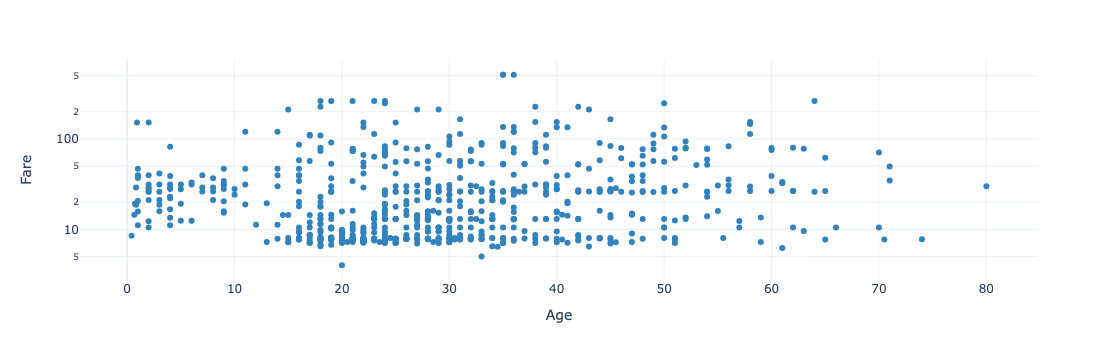

In [26]:
fig = px.scatter(data_frame=df,
                 x='Age',
                 y='Fare',
                 hover_data=['Name', 'Sex'],
                 template='plotly_white',
                 color_discrete_sequence=['#3182bd'],
                 log_y=True)
fig.show()

## Bar Charts

We can create some [interesting bar chart variations](https://plot.ly/python/bar-charts/):

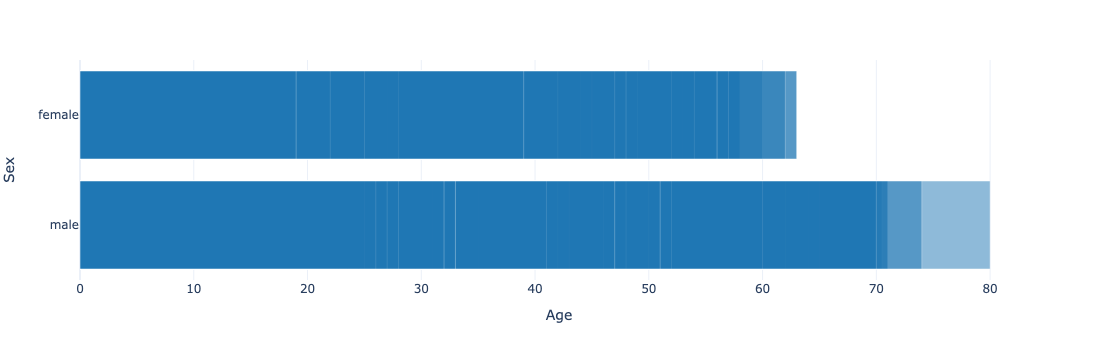

In [27]:
fig = px.bar(df, 
             x='Age', 
             y='Sex',
             barmode='overlay',
             hover_data=['Name'],
             template='plotly_white',
             color_discrete_sequence=px.colors.qualitative.D3
            )
fig.show()

## Histograms

In [28]:
df['Survived'].dtype

dtype('int64')

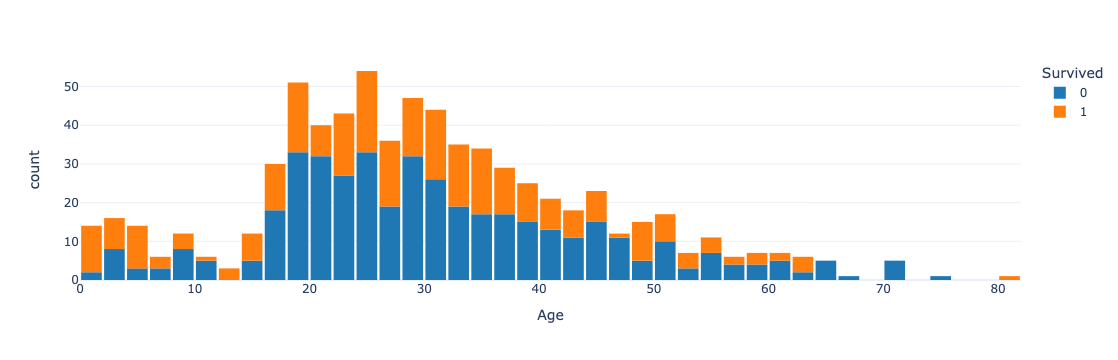

In [29]:
fig = px.histogram(df, 
                   x='Age', 
                   color='Survived',
                   template='plotly_white',
                   color_discrete_sequence=px.colors.qualitative.D3
                  )

fig.update_layout(
    bargap=0.1, # gap between bars of adjacent location coordinates
)

fig.show()

## Bubble Plot

For this plot, we'll transform the data a bit to investigate the survival rates across different age decades.

In [30]:
# calculate decade
df['Age_rounded'] = df['Age'].round(-1)
df[['Age', 'Age_rounded']].head()

,Age,Age_rounded
0,22.0,20.0
1,38.0,40.0
2,26.0,30.0
3,35.0,40.0
4,35.0,40.0


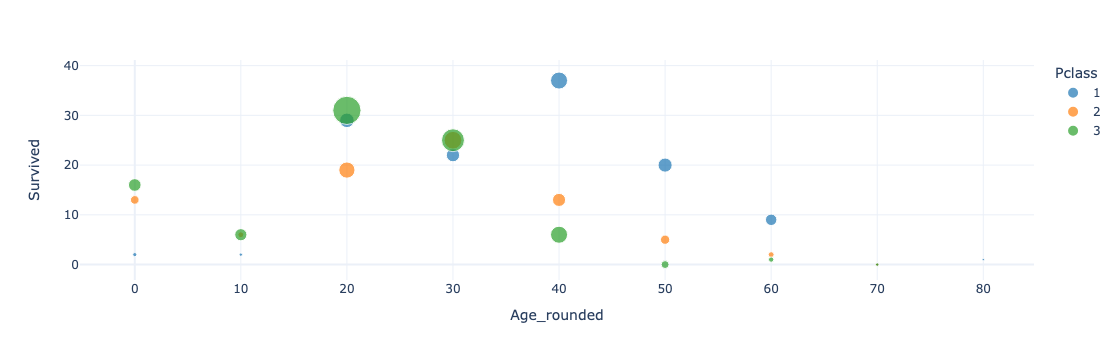

In [31]:
df_plot = df.groupby(['Pclass', 'Age_rounded'])['Survived'] \
            .agg([('Survived', 'sum'), 
                  ('Passengers', 'count')]).reset_index()

df_plot["Pclass"] = df_plot["Pclass"].astype(str)

fig = px.scatter(data_frame=df_plot,
                 x='Age_rounded',
                 y='Survived',
                 size='Passengers',
                 color='Pclass',
                 color_discrete_sequence=px.colors.qualitative.D3,
                 template='plotly_white')
fig.show()

## Limitations ...

What if we want to be able to "animate" the age decade of the passengers? [Be careful](https://plotly.com/python/animations/#:~:text=Animations%20are%20designed%20to%20work%20well%20when%20each%20row%20of%20input%20is%20present%20across%20all%20animation%20frames%2C%20and%20when%20categorical%20values%20mapped%20to%20symbol%2C%20color%20and%20facet%20are%20constant%20across%20frames.%20Animations%20may%20be%20misleading%20or%20inconsistent%20if%20these%20constraints%20are%20not%20met.).

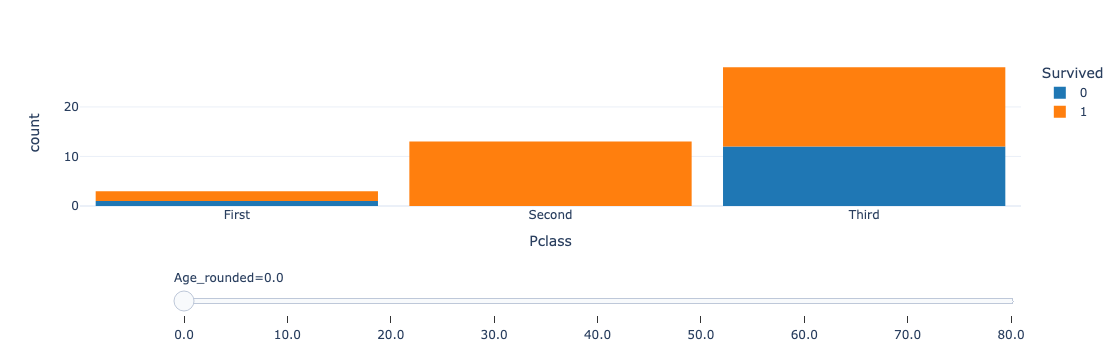

In [32]:
fig = px.histogram(df.sort_values('Age_rounded'), 
                   x='Pclass',
                   color='Survived',
                   template='plotly_white',
                   animation_frame="Age_rounded",  # this is the value to "animate"
                   # animation_group="PassengerId",  # uncomment this ...
                   color_discrete_sequence=px.colors.qualitative.D3)

fig.update_layout(
    xaxis_tickmode = 'array',
    xaxis_tickvals = [1, 2, 3],
    xaxis_ticktext = ['First', 'Second', 'Third'],
    bargap=0.1, # gap between bars of adjacent location coordinates
)

fig["layout"].pop("updatemenus") # drop animation buttons
fig.show()

**(In class, if there's time) Can we improve on this?**

In [33]:
# fig = px.histogram(df.sort_values('Age_rounded'), 
#                    x='Pclass',
#                    facet_row='Survived',
#                    color='Age_rounded',
#                    template='plotly_white',
#                    color_discrete_sequence=px.colors.sequential.Blues)

# fig.update_layout(
#     xaxis_tickmode = 'array',
#     xaxis_tickvals = [1, 2, 3],
#     xaxis_ticktext = ['First', 'Second', 'Third'],
#     bargap=0.1, # gap between bars of adjacent location coordinates
# )

# fig["layout"].pop("updatemenus") # drop animation buttons
# fig.show()

# EXERCISES

## Exercise 1

Take a look at the `Cabin` column of the data, and investigate how it relates to at least one other column. Consider the context of the Titanic ship wreck. Try to formulate a question around this column, and visualize it using Plotly. **Build at least 2 different plots** of the same data.

Feel free to use the [gallery](https://plotly.com/python/) as a resource.

In [34]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_rounded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,40.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,30.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,40.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,40.0


In [35]:
df.shape

(891, 13)

In [36]:
df["Cabin"].isna().sum()

687

In [41]:
df_cabin = df["Cabin"].value_counts().reset_index()

In [47]:
df_cabin["Cabin"]

0          B96 B98
1               G6
2      C23 C25 C27
3          C22 C26
4              F33
          ...     
142            E34
143             C7
144            C54
145            E36
146           C148
Name: Cabin, Length: 147, dtype: object

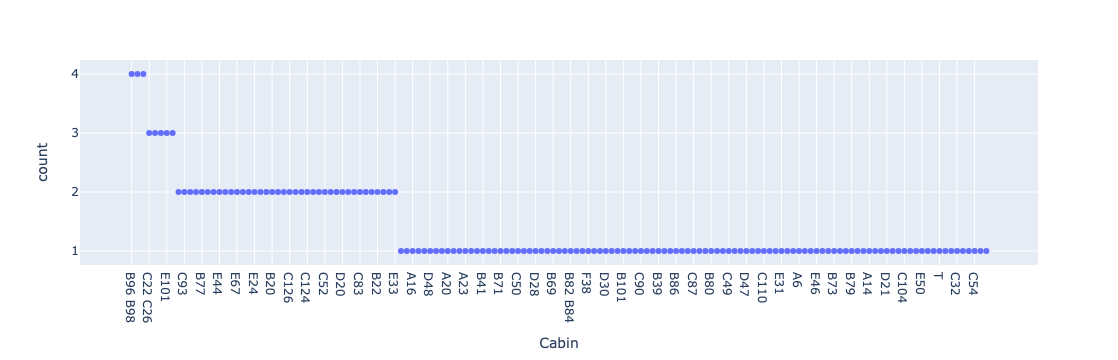

In [55]:
import plotly.express as px

fig = px.scatter(df_cabin, x="Cabin", y="count")
fig.show()

In [60]:
df_cabin_group = df.groupby(['Cabin', 'Sex'])["Survived"].sum().reset_index()
df_cabin_group_sorted = df_cabin_group.sort_values(by='Survived', ascending=False)
df_cabin_group_sorted.head()

,Cabin,Sex,Survived
135,E101,female,3
165,F33,female,3
63,C125,female,2
140,E24,male,2
26,B35,female,2


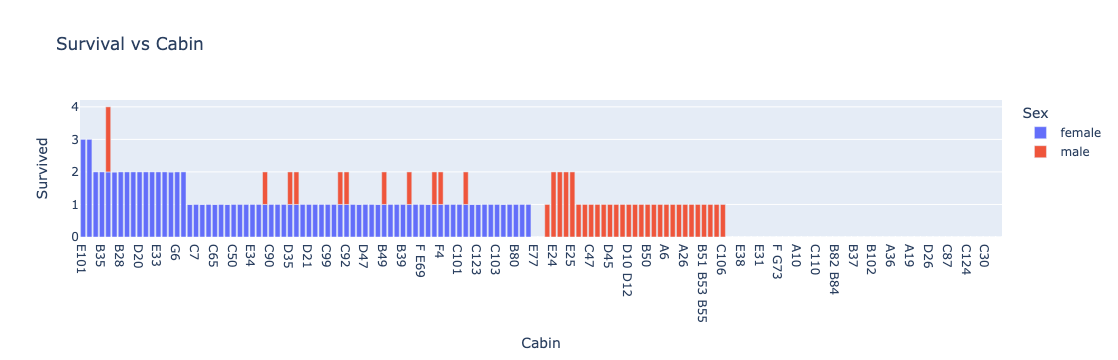

In [66]:
fig = px.bar(df_cabin_group_sorted, x="Cabin", y="Survived", color="Sex", title="Survival vs Cabin")
fig.show()

#### Attaching the screenshot of the graph here because the graph is not reflecting on <b><u>Github
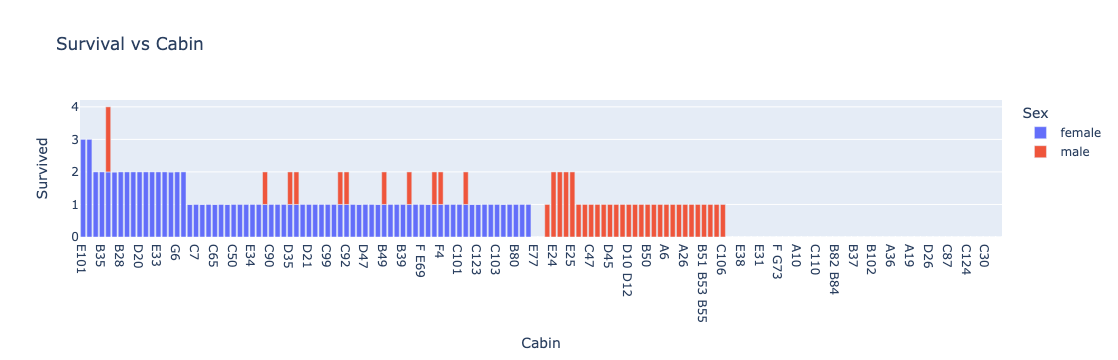

## Exercise 2

Consider the Bubble Plot, above. Try to figure out what it might be trying to communicate.

1. Point out at least three issues with this visualization.
2. Build at least two visualizations in Plotly that communicate a similar message, but which do it far better.

### Issues with the Plot
1. It is difficult to see the relationship between age and survival. The bubbles are all plotted on top of each other, so it is hard to see if there is a trend in the data.
2. The color coding is not very effective. The color scale is not very well-defined, so it is difficult to tell the difference between the different passenger classes.
3. The size of the bubbles is not very meaningful. The size of the bubbles is determined by the number of passengers, but this is not a very important variable in this context.

### Alternatives
1. <b>Bar chart</b>: This would show the number of passengers who survived in each age group for each passenger class. This would make it easier to see if there is a trend between age and survival.
2. <b>Heatmap</b>: This would show the number of passengers who survived in each age group for each passenger class as a color gradient. This would make it easier to see the distribution of the data.

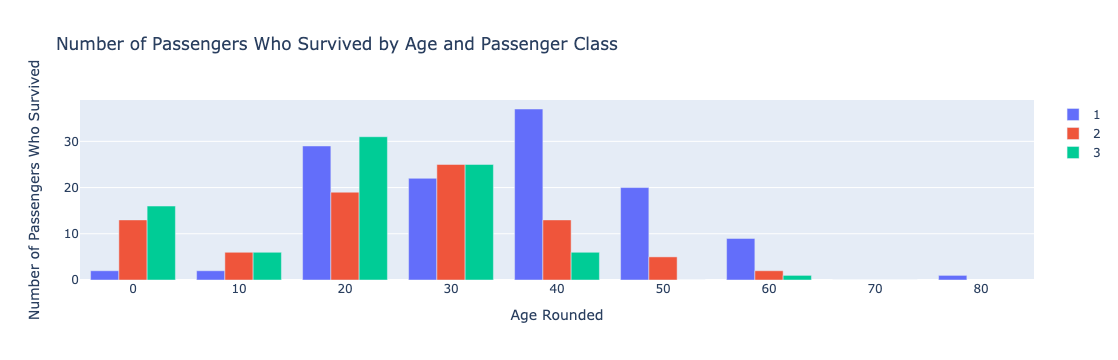

In [64]:
import plotly.graph_objects as go
fig = go.Figure()

for pclass in df_plot['Pclass'].unique():
    df_filtered = df_plot[df_plot['Pclass'] == pclass]
    fig.add_trace(go.Bar(
        x=df_filtered['Age_rounded'],
        y=df_filtered['Survived'],
        name=pclass
    ))

fig.update_layout(
    title='Number of Passengers Who Survived by Age and Passenger Class',
    xaxis_title='Age Rounded',
    yaxis_title='Number of Passengers Who Survived'
)

fig.show()

#### Attaching the screenshot of the graph here because the graph is not reflecting on <b><u>Github
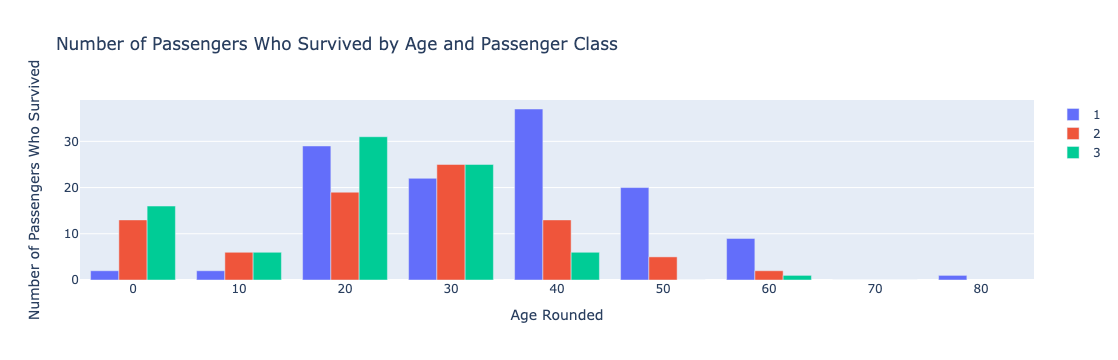

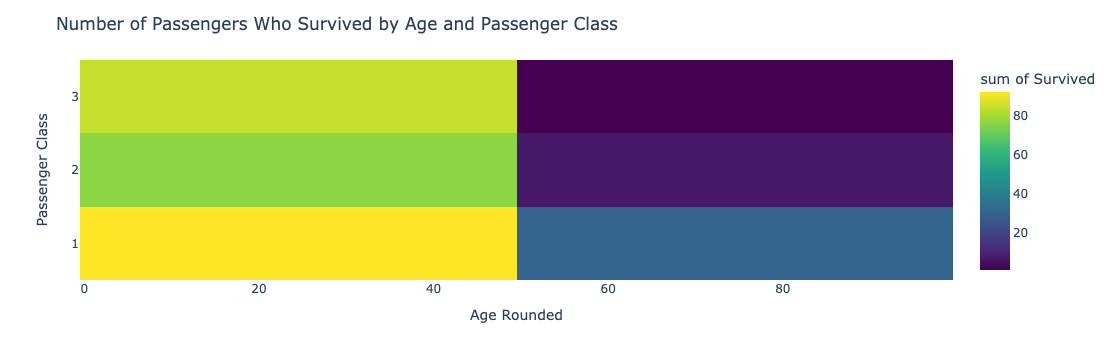

In [65]:
fig = px.density_heatmap(
    df_plot,
    x='Age_rounded',
    y='Pclass',
    z='Survived',
    color_continuous_scale='viridis'
)

fig.update_layout(
    title='Number of Passengers Who Survived by Age and Passenger Class',
    xaxis_title='Age Rounded',
    yaxis_title='Passenger Class'
)

fig.show()

#### Attaching the screenshot of the graph here because the graph is not reflecting on <b><u>Github
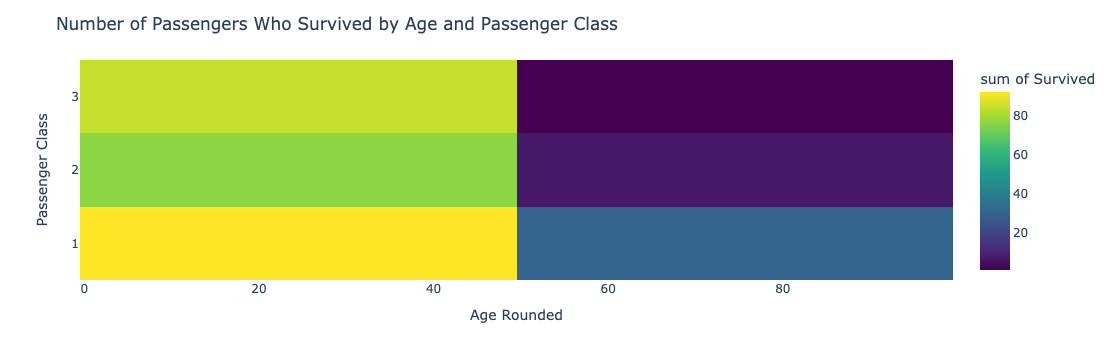